<a href="https://colab.research.google.com/github/aadhithcj/cgipassignment/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving shrek.0.webp to shrek.0.webp


In [4]:
from google.colab import files
uploaded = files.upload()


Saving shrek.0.jpg to shrek.0.jpg


In [5]:
import numpy as np
import cv2
img = cv2.imread('shrek.0.jpg')
print(img.shape)
print(img.size)

(746, 1120, 3)
2506560


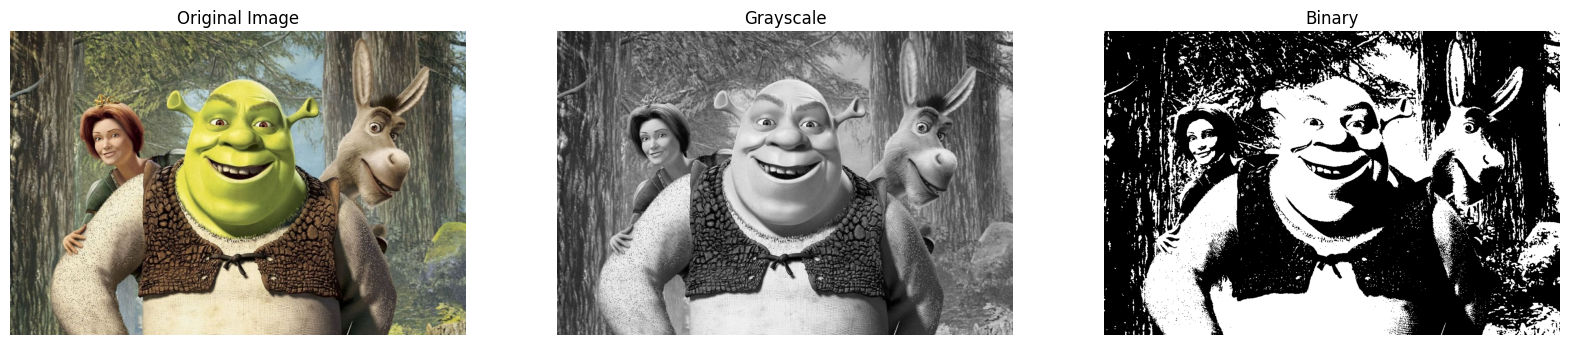

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("shrek.0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')
axes[2].imshow(binary_img, cmap='gray')
axes[2].set_title('Binary')
axes[2].axis('off')
plt.show()

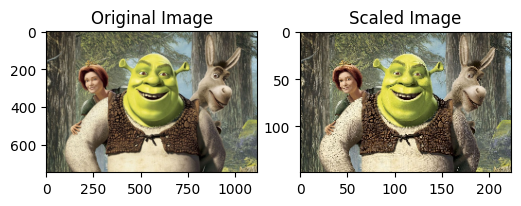

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("shrek.0.jpg")
newImg = cv2.resize(img, (0, 0), fx=0.2, fy=0.2)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('on')

axes[1].imshow(cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB))
axes[1].set_title('Scaled Image')
axes[1].axis('on')

plt.show()

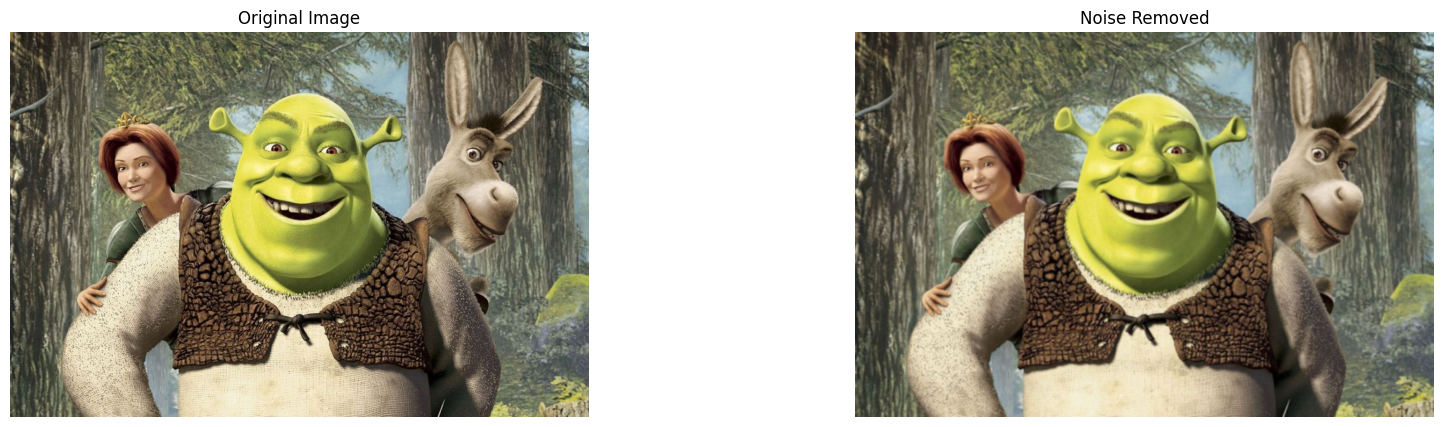

In [10]:


#noise removal
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("shrek.0.jpg")

img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)


y, cr, cb = cv2.split(img_ycrcb)

y_denoised = cv2.GaussianBlur(y, (5, 5), 0)

img_denoised = cv2.merge((y_denoised, cr, cb))


img_denoised = cv2.cvtColor(img_denoised, cv2.COLOR_YCrCb2BGR)


fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_denoised, cv2.COLOR_BGR2RGB))
axes[1].set_title('Noise Removed')
axes[1].axis('off')

plt.show()

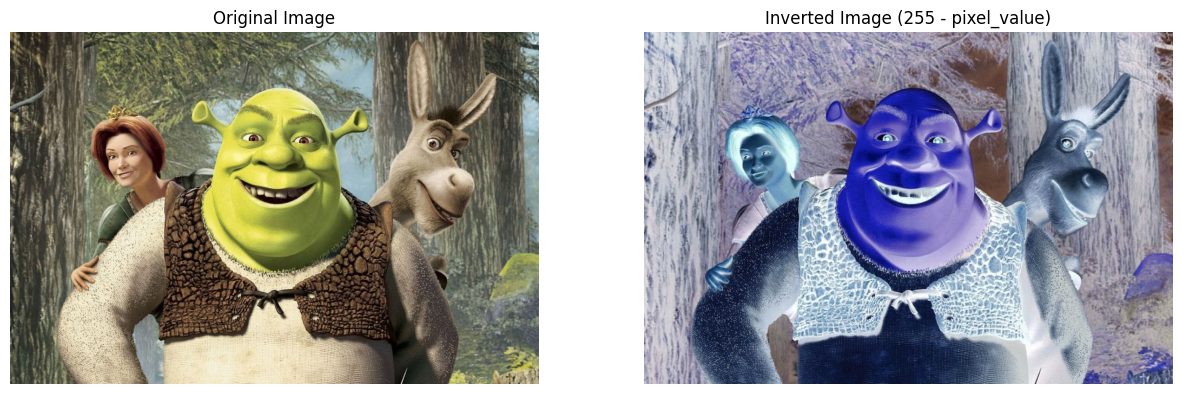

In [12]:
#inverse transformation
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("shrek.0.jpg")
if image is None:
    print("Error: Image not found. Please check the file path!")
else:
    inverted_image = 255 - image


    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Inverted Image (255 - pixel_value)')
    axes[1].axis('off')
    plt.show()

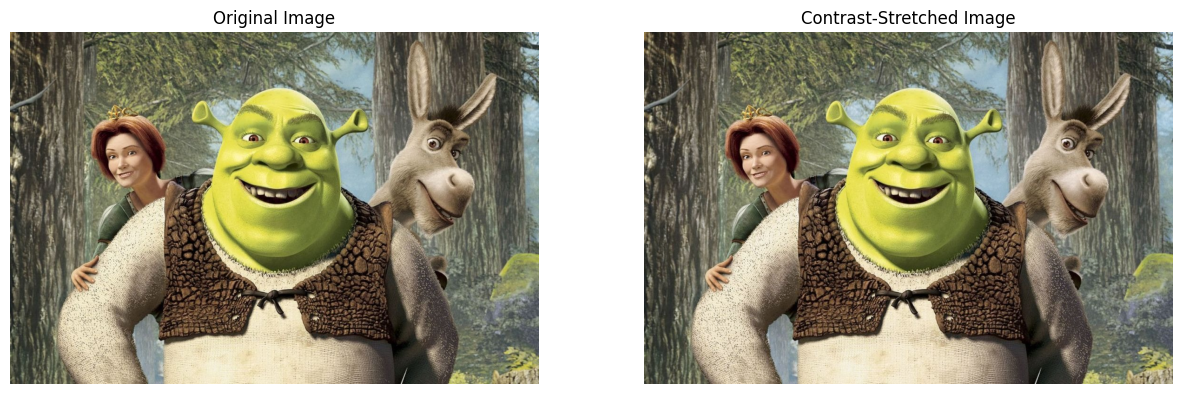

In [13]:
#contrast stretching
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("shrek.0.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(image_rgb)
def contrast_stretch(channel):
    min_pixel = np.min(channel)
    max_pixel = np.max(channel)
    return ((channel - min_pixel) * (255.0 / (max_pixel - min_pixel))).astype(np.uint8)
r_stretched = contrast_stretch(r)
g_stretched = contrast_stretch(g)
b_stretched = contrast_stretch(b)
stretched_image = cv2.merge([r_stretched, g_stretched, b_stretched])
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(stretched_image)
axes[1].set_title('Contrast-Stretched Image')
axes[1].axis('off')
plt.show()

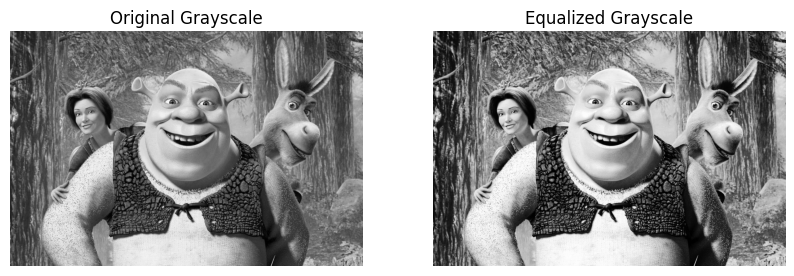

In [14]:
#histogram equalization

import cv2
from matplotlib import pyplot as plt
from PIL import Image

image = cv2.imread("shrek.0.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(gray)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')
axes[1].imshow(equalized_gray, cmap='gray')
axes[1].set_title('Equalized Grayscale')
axes[1].axis('off')

plt.show()

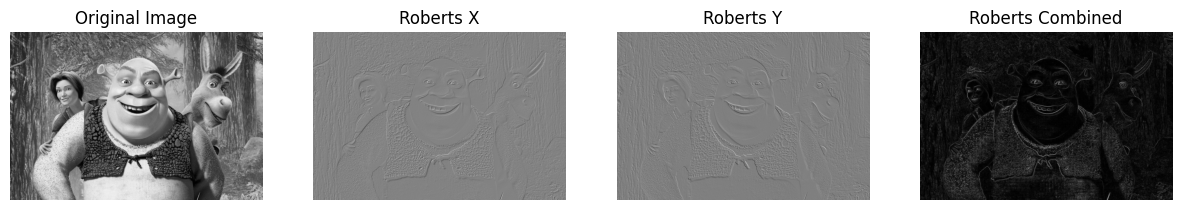

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("shrek.0.jpg", cv2.IMREAD_GRAYSCALE)
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x_img = cv2.filter2D(img, cv2.CV_64F, roberts_x)
roberts_y_img = cv2.filter2D(img, cv2.CV_64F, roberts_y)
roberts_combined = cv2.magnitude(roberts_x_img, roberts_y_img)
roberts_combined = np.uint8(255 * roberts_combined / np.max(roberts_combined))
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(roberts_x_img, cmap='gray')
plt.title('Roberts X'), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(roberts_y_img, cmap='gray')
plt.title('Roberts Y'), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Combined'), plt.axis('off')
plt.show()